###Imports

In [6]:
from google.colab import drive
import pandas as pd
from math import ceil
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.style as style
import seaborn as sns
import numpy as np

In [7]:
!pip install category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###Mount drive and show data


In [9]:
df = pd.read_csv('dataset_hr.csv')

In [10]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [11]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [13]:
def count_percent(data):
  df_cols = pd.DataFrame({'Count Missing': data.isnull().sum(),
                        'Percent Missing': data.isnull().sum()*100/data.shape[0]})
  return df_cols

count_percent(df)

,Count Missing,Percent Missing
enrollee_id,0,0.000000
city,0,0.000000
city_development_index,0,0.000000
gender,4508,23.530640
relevent_experience,0,0.000000
enrolled_university,386,2.014824
education_level,460,2.401086
major_discipline,2813,14.683161
experience,65,0.339284
company_size,5938,30.994885


In [14]:
#drop nan values
df.dropna(inplace=True)

##Here I did compare the features that might influence the move to a new job and get the max, min, and mean of the features

In [15]:
display(df[['city','city_development_index','relevent_experience','gender','education_level','major_discipline','experience','company_size','company_type','target']]
        .groupby(['gender','education_level','experience','company_size']).agg(["max",'mean',"min"]).style.background_gradient(cmap="Oranges"))

<ipython-input-15-e5f1b1b90f0c>:2: FutureWarning: ['city', 'relevent_experience', 'major_discipline', 'company_type'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  .groupby(['gender','education_level','experience','company_size']).agg(["max",'mean',"min"]).style.background_gradient(cmap="Oranges"))


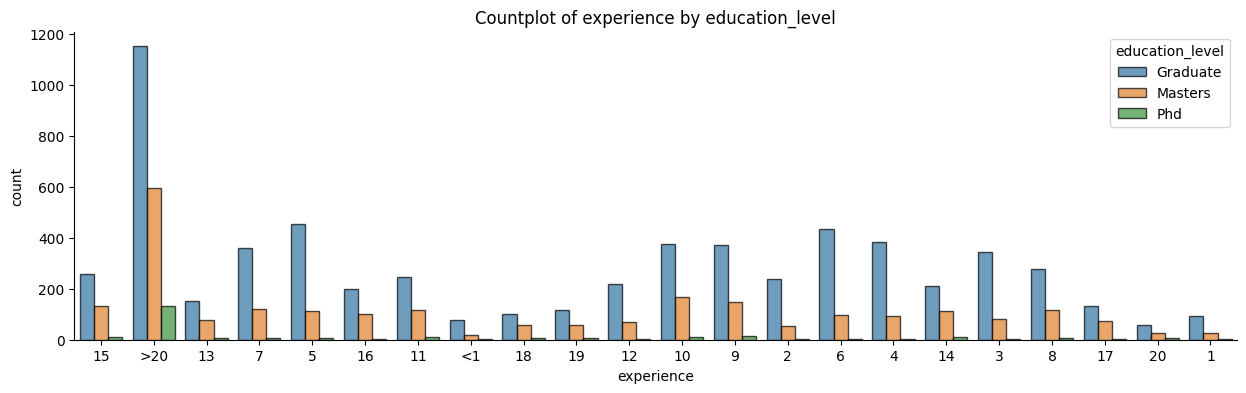

In [16]:
plt.figure(figsize=[15,4])
sns.countplot(x='experience', hue='education_level',edgecolor="black", alpha=0.7, data=df)
sns.despine()
plt.title("Countplot of experience by education_level")
plt.show()

#### Start Enconding Categorical Values
----

In [17]:
#Here we are removing columns that, based on our study of the dataset, are not relevant to the final training outcome.
df.drop(['enrollee_id','city', 'training_hours','gender','experience', 'relevent_experience', 'major_discipline', 'company_size', 'company_type'], axis=1, inplace=True)
df

,city_development_index,enrolled_university,education_level,last_new_job,target
1,0.776,no_enrollment,Graduate,>4,0.0
4,0.767,no_enrollment,Masters,4,0.0
7,0.762,no_enrollment,Graduate,>4,1.0
8,0.920,no_enrollment,Graduate,1,1.0
11,0.920,no_enrollment,Graduate,1,0.0
...,...,...,...,...,...
19147,0.624,Full time course,Graduate,1,1.0
19149,0.920,no_enrollment,Masters,1,1.0
19150,0.920,no_enrollment,Graduate,3,0.0
19152,0.920,no_enrollment,Graduate,1,0.0


In [18]:
#Here we are converting categorical data into numeric values.
def transform_categorical_data(dataset):
    mapping_dict = {}

    for column in dataset.columns:
        if dataset[column].dtype == 'object':  # Check if column contains categorical data
            distinct_categories = dataset[column].unique()
            mapping_dict[column] = {category: i+1 for i, category in enumerate(distinct_categories)}

    transformed_dataset = dataset.replace(mapping_dict)

    return transformed_dataset

df_final = transform_categorical_data(df)

In [19]:
df_final.shape

(8955, 5)

##Starting the JOBS 🔥

**Train-Test Split**

In [20]:
#Defining who is X and who is y
#X is already encoded
X = df_final.drop(['target'], axis=1).values
y = df_final['target'].values

In [21]:
df_final.columns

Index(['city_development_index', 'enrolled_university', 'education_level',
       'last_new_job', 'target'],
      dtype='object')

In [22]:
X

array([[0.776, 1.   , 1.   , 1.   ],
       [0.767, 1.   , 2.   , 2.   ],
       [0.762, 1.   , 1.   , 1.   ],
       ...,
       [0.92 , 1.   , 1.   , 4.   ],
       [0.92 , 1.   , 1.   , 3.   ],
       [0.92 , 1.   , 1.   , 2.   ]])

In [23]:
print("Tipo de X, Shape de X: ", type(X), X.shape)
print("Tipo de y, Shape de y: ", type(y), y.shape)

Tipo de X, Shape de X:  <class 'numpy.ndarray'> (8955, 4)
Tipo de y, Shape de y:  <class 'numpy.ndarray'> (8955,)


In [24]:
#Stratify to balance label data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [25]:
unique_values, counts = np.unique(y_test, return_counts=True)

#Print the occurrencies
for value, count in zip(unique_values, counts):
    print(f"Value {value} appears {count} times.")

Value 0.0 appears 1494 times.
Value 1.0 appears 297 times.


#SUPPORT VECTOR MACHINE

In [26]:
#Fit the model
model = SVC(kernel='poly')
model.fit(X_train, y_train)

SVC(kernel='poly')

**Model predict**

In [27]:
predict = model.predict(X_test)

In [28]:
#test accuracy
print("Test accuracy: ", accuracy_score(y_test, predict))

Test accuracy:  0.8341708542713567


**Cross Validation**

In [29]:
param_grid = {'C': [1, 5, 50],
              'gamma': [0.0001, 0.0005, 0.01, 0.5]}

              #param_grid = {'C': [1, 5, 50],
              #'gamma': [0.0001, 0.0005, 0.01, 0.5]}
grid = GridSearchCV(estimator=SVC(kernel='rbf'), param_grid=param_grid, cv=5)

%time grid.fit(X_train, y_train)
print(grid.best_params_)

CPU times: user 46.3 s, sys: 1.68 s, total: 47.9 s
Wall time: 48.1 s
{'C': 50, 'gamma': 0.5}


**Ein, Eout and Report**

In [30]:
clf = grid.best_estimator_

#making predictions on the testing set
y_pred = clf.predict(X_test)


print('Ein: %0.4f' % (1 - accuracy_score(y_train, clf.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, clf.predict(X_test))))
print(classification_report(y_test, y_pred))

Ein: 0.1452
Eout: 0.1502
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      1494
         1.0       0.59      0.31      0.40       297

    accuracy                           0.85      1791
   macro avg       0.73      0.63      0.66      1791
weighted avg       0.83      0.85      0.83      1791



#### Neural Network
----
### Neural Architecture
- N° of Neurons
- Batch size
- Epochs

In [31]:
#Calculating the Model DVC
DS = X_train.shape[0]
features = X_train.shape[1]
#Calculating to one hidden layer
n = (DS - 10) / (10*(features + 2))
n = ceil(n)
print("Amount of neurons: ", n)

Amount of neurons:  120


In [32]:
#Set the mini_batch Size
batch_size = 256
epochs = 100
print("Amount of epochs: ", epochs)

Amount of epochs:  100


In [33]:
#Creating the model
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn import model_selection
from keras import regularizers

#Instantiate the object
model = Sequential()
#Add the entry layer using DVC1s values and respecting Golden Rule
#Including BIAS in every Neuron
model.add(Dense(n, input_dim=features, kernel_initializer='normal', activation='relu',use_bias = True, bias_initializer='ones'))
#Out Layer
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

#Optimizer Adam
adam = optimizers.Adam(learning_rate=0.01)

#Compile the model
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               600       
                                                                 
 dense_1 (Dense)             (None, 1)                 121       
                                                                 
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
#Split the data in Data Train and Validation
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, test_size=0.2,shuffle=True,random_state=55)

In [35]:
#Fit the model
%time history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))


Epoch 1/100
23/23 [==============================] - 1s 15ms/step - loss: 0.5039 - accuracy: 0.8046 - val_loss: 0.4527 - val_accuracy: 0.8395
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4479 - accuracy: 0.8332 - val_loss: 0.4312 - val_accuracy: 0.8395
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4391 - accuracy: 0.8332 - val_loss: 0.4240 - val_accuracy: 0.8395
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4326 - accuracy: 0.8332 - val_loss: 0.4184 - val_accuracy: 0.8395
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4287 - accuracy: 0.8332 - val_loss: 0.4147 - val_accuracy: 0.8395
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4236 - accuracy: 0.8330 - val_loss: 0.4033 - val_accuracy: 0.8395
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4116 - accuracy: 0.8332 - val_loss: 0.3939 - val_accuracy: 0.8395
Epoch 8/100


In [36]:
plt.style.use('ggplot')
#Model history
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Train acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Train loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Train and validation error')
    plt.legend()

In [37]:
model.predict(X_train)

180/180 [==============================] - 0s 1ms/step


array([[0.08773182],
       [0.18134809],
       [0.10590468],
       ...,
       [0.09943673],
       [0.1413628 ],
       [0.09420124]], dtype=float32)

In [38]:
print('Ein: %0.4f' % (1 - accuracy_score(y_train, [round(i[0]) for i in model.predict(X_train)])))
print('Eout: %0.4f' % (1 - accuracy_score(y_test,[round(i[0]) for i in model.predict(X_test)])))
print(classification_report(y_test, y_pred))

180/180 [==============================] - 0s 1ms/step
Ein: 0.1412
56/56 [==============================] - 0s 1ms/step
Eout: 0.1480
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      1494
         1.0       0.59      0.31      0.40       297

    accuracy                           0.85      1791
   macro avg       0.73      0.63      0.66      1791
weighted avg       0.83      0.85      0.83      1791



In [39]:
model.predict(X_train)[0][0]

180/180 [==============================] - 0s 1ms/step


0.08773182

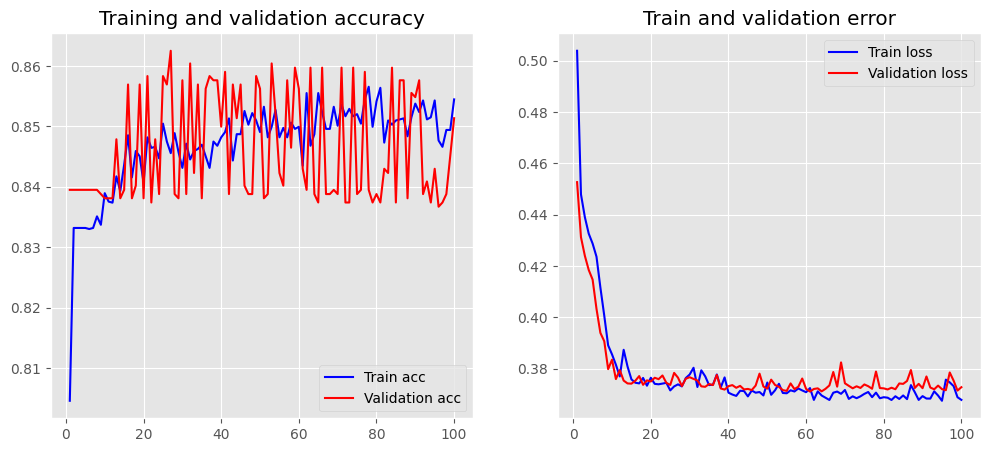

In [40]:
 plot_history(history)

### Decision Tree
----

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#Instantiating the classifier and defining the maximum depth of the tree, there was an improvement in classification 1 with a limit of 10
clf = DecisionTreeClassifier(max_depth=10, random_state=0)
%time clf.fit(X_train, y_train)

CPU times: user 7.26 ms, sys: 0 ns, total: 7.26 ms
Wall time: 9.56 ms


DecisionTreeClassifier(max_depth=10, random_state=0)

In [42]:
#Calculating Ein and Eout
print('Ein: %0.4f' % (1 - accuracy_score(y_train, clf.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, clf.predict(X_test))))
print(classification_report(y_test, clf.predict(X_test)))

Ein: 0.1258
Eout: 0.1535
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      1494
         1.0       0.55      0.42      0.47       297

    accuracy                           0.85      1791
   macro avg       0.72      0.67      0.69      1791
weighted avg       0.83      0.85      0.84      1791



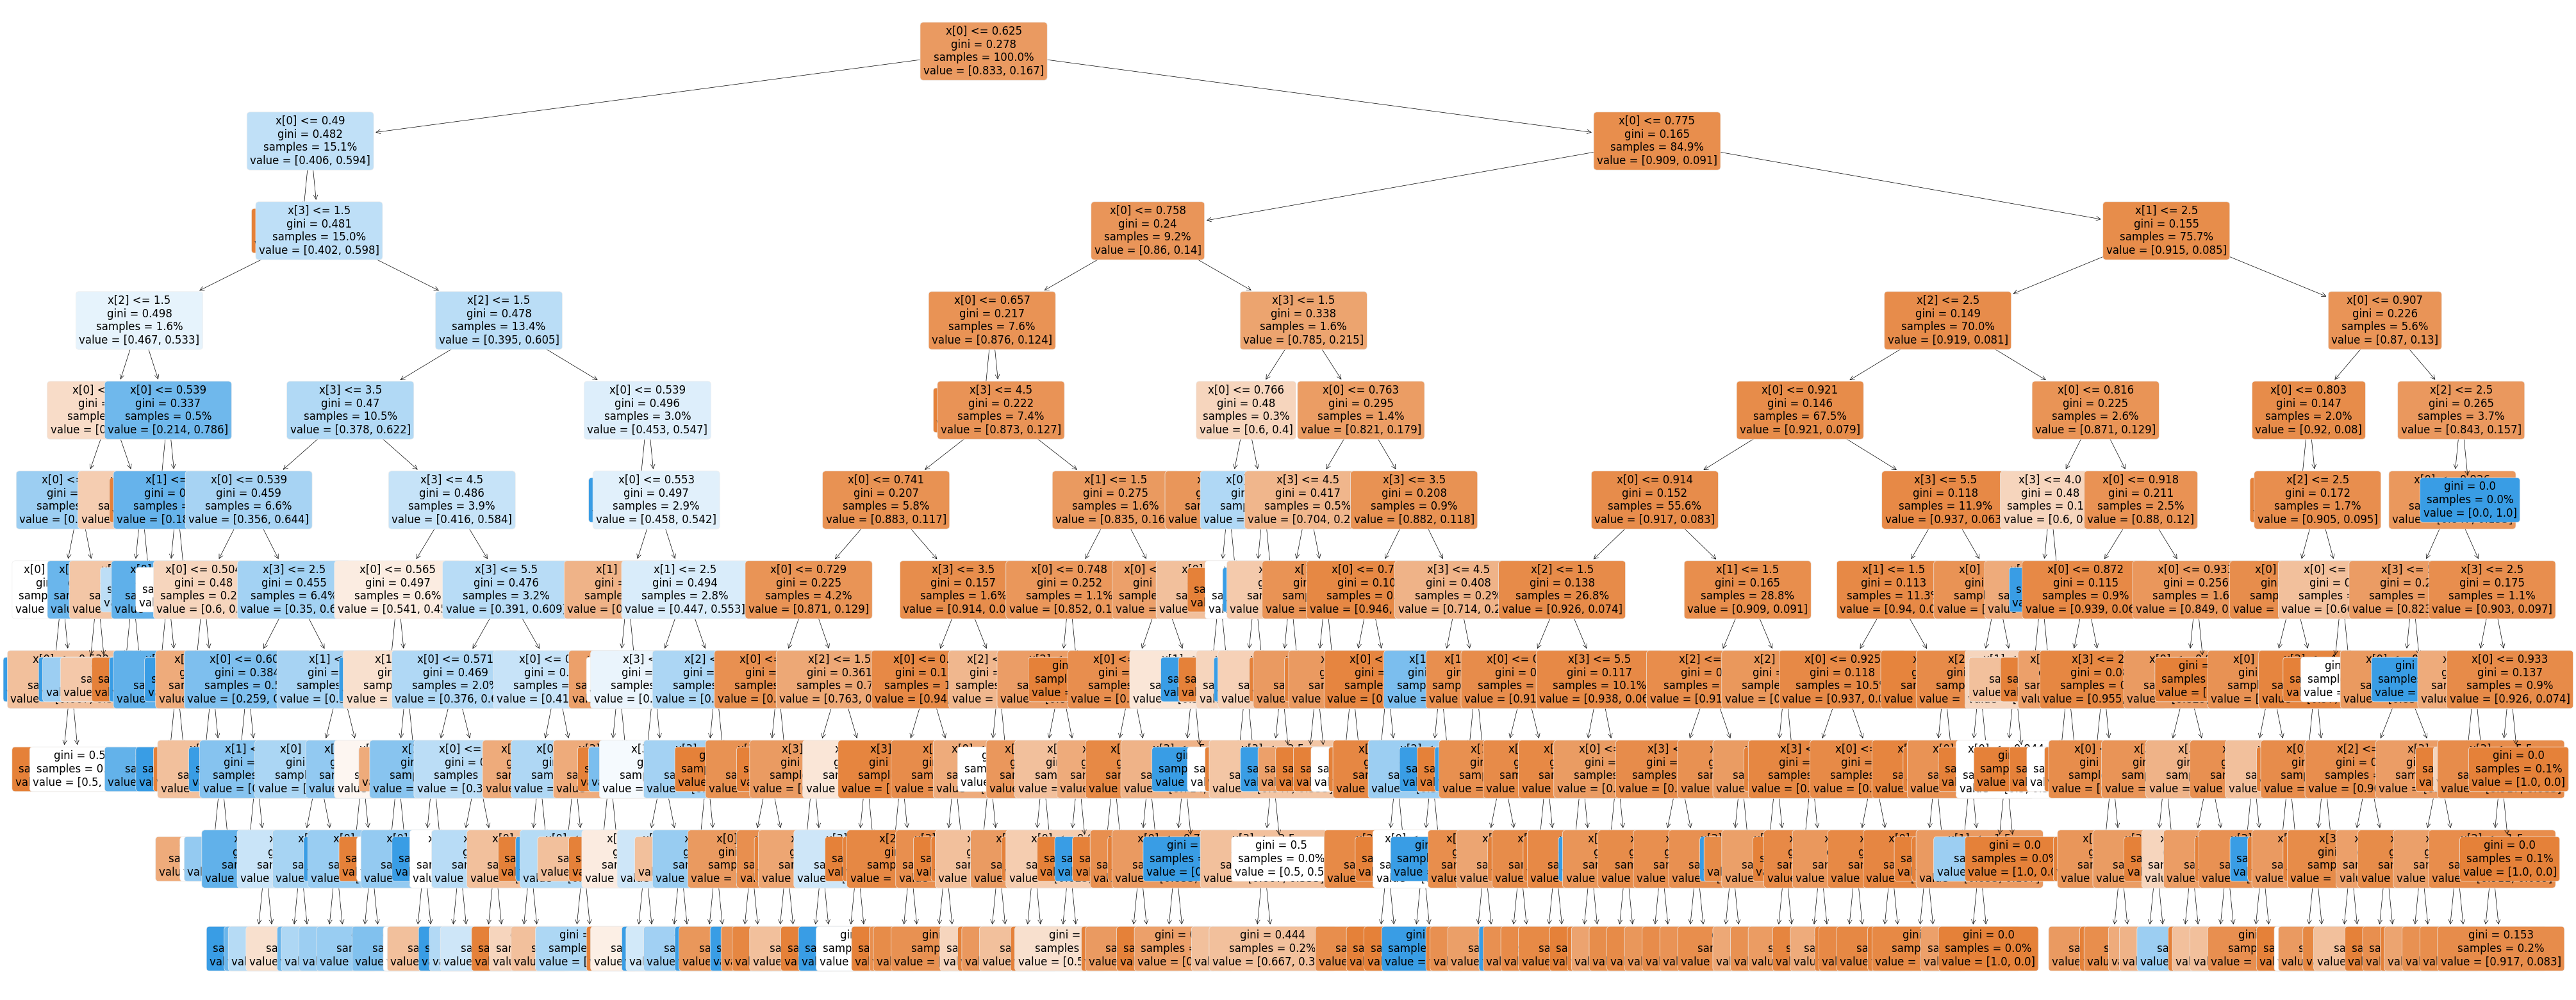

In [43]:
#Plot the Decision Tree
plt.figure(figsize=(50,20))
plot_tree(
    clf,
    filled=True,
    proportion = True,
    fontsize=12,
    rounded = True)
plt.show()

Minimal Cost-Complexity Prunning
----
- É um algoritmo usado para podar nós da árvore evitando o surgimento de *overfitting*.


In [44]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

X_train shape:  (5731, 4)
y_train shape:  (5731,)


When performing decision tree pruning using MCCP, the idea is to find an alpha value that minimizes leaf impurity while avoiding an overfitting model. Effective alpha represents a trade-off between model complexity and data fit.

[0.00000000e+00 4.25933833e-06 4.77264321e-06 6.22102557e-06
 6.47014339e-06 7.75554521e-06 9.40066087e-06 1.10793503e-05
 1.29039632e-05 1.55110904e-05 1.55292660e-05 1.65067347e-05
 1.68598809e-05 2.14211364e-05 2.32666356e-05 2.57050200e-05
 2.58518174e-05 2.60325993e-05 2.67099010e-05 2.79199628e-05
 3.07709891e-05 3.10221809e-05 3.15796673e-05 3.22308373e-05
 3.45396365e-05 3.66992558e-05 3.87777261e-05 3.87777261e-05
 3.90320285e-05 4.13067082e-05 4.26554987e-05 4.34698627e-05
 4.43174012e-05 4.44803328e-05 4.65332713e-05 4.74909398e-05
 4.81710883e-05 4.92659944e-05 4.93905774e-05 5.17036348e-05
 5.38995420e-05 5.64039652e-05 5.81665891e-05 6.07931952e-05
 6.20443617e-05 6.29773596e-05 6.46295435e-05 6.97999069e-05
 7.56819657e-05 7.57863252e-05 7.61453530e-05 7.75554521e-05
 7.75554521e-05 8.38460731e-05 9.30665426e-05 9.51372554e-05
 9.69443152e-05 9.86373124e-05 1.09468222e-04 1.10367374e-04
 1.11098410e-04 1.11878980e-04 1.15788929e-04 1.16333178e-04
 1.16333178e-04 1.195646

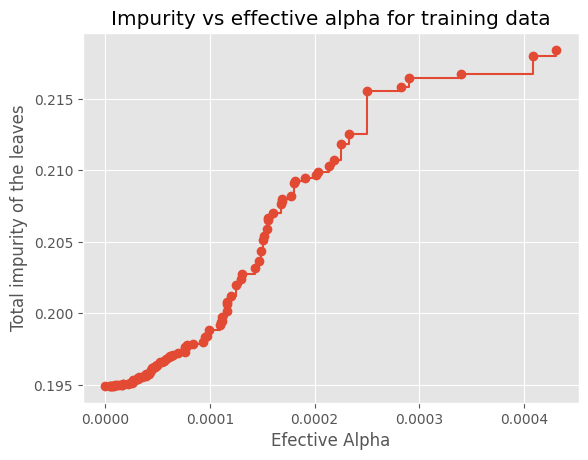

In [45]:
#Split X_train in Train and Validation
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, test_size=0.25)

#Here, a path object is created that represents the pruning path based on cost-complexity.
path = clf.cost_complexity_pruning_path(X_train, y_train)
#Alphas and each Impurity associated with each Alpha
ccp_alphas, impurities = path.ccp_alphas, path.impurities

#Plot the relationship between the alpha values ​​and impurity of the leaves
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("Efective Alpha")
ax.set_ylabel("Total impurity of the leaves")
ax.set_title("Impurity vs effective alpha for training data")
fig.show()

print(ccp_alphas)
print(impurities)

In [46]:
#Create a list of decision tree models that are trained on different values ​​of ccp_alpha.
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

#Discard the last one as trivial (root node only)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

Plot graphs with the relationships between the value of $\alpha$ and the number of nodes and the value of $\alpha$ and the depth of the trees.

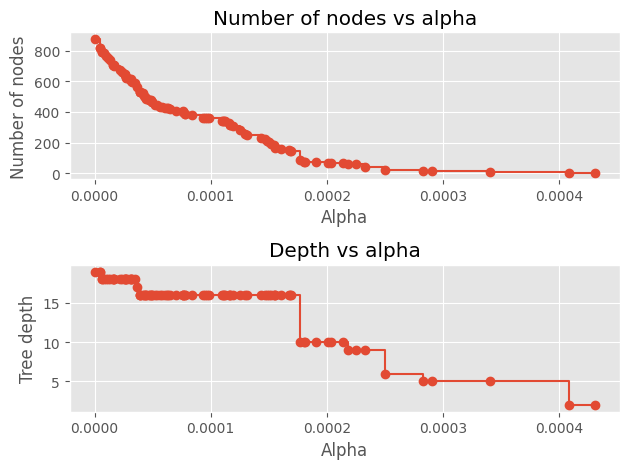

In [47]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Tree depth")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

- Use the training and validation instance to compute the accuracies of each data set
- Plot the relationship between the accuracy values ​​and the validated $\alpha$ values.

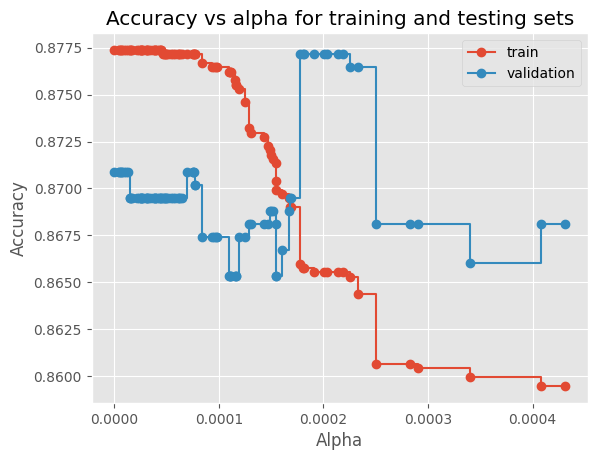

In [48]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
val_scores = [clf.score(X_val, y_val) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker="o", label="validation", drawstyle="steps-post")
ax.legend()
plt.show()

In [49]:
#Find the best alpha
best_acc = 0
for v, i in zip(val_scores, range(len(val_scores))):
  if best_acc < v:
    best_acc = v
    best_alpha = clfs[i].ccp_alpha

print("Best alpha: ",best_alpha)

Best alpha:  0.00017726960491036808


- Building the Decision Tree with the parameter value $ccp\_alpha$ that obtained the best accuracy result in the validation instance

In [50]:
#Train test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2,shuffle=True,random_state=55)

print("X_train_encoded Shape: ", X_train.shape)
print("X_test_encoded Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train_encoded Shape:  (7164, 4)
X_test_encoded Shape:  (1791, 4)
y_train Shape:  (7164,)
y_test Shape:  (1791,)


CPU times: user 13.4 ms, sys: 43 µs, total: 13.4 ms
Wall time: 14.6 ms
Ein: 0.1325
Eout: 0.1519
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      1451
         1.0       0.63      0.50      0.55       340

    accuracy                           0.85      1791
   macro avg       0.76      0.71      0.73      1791
weighted avg       0.84      0.85      0.84      1791



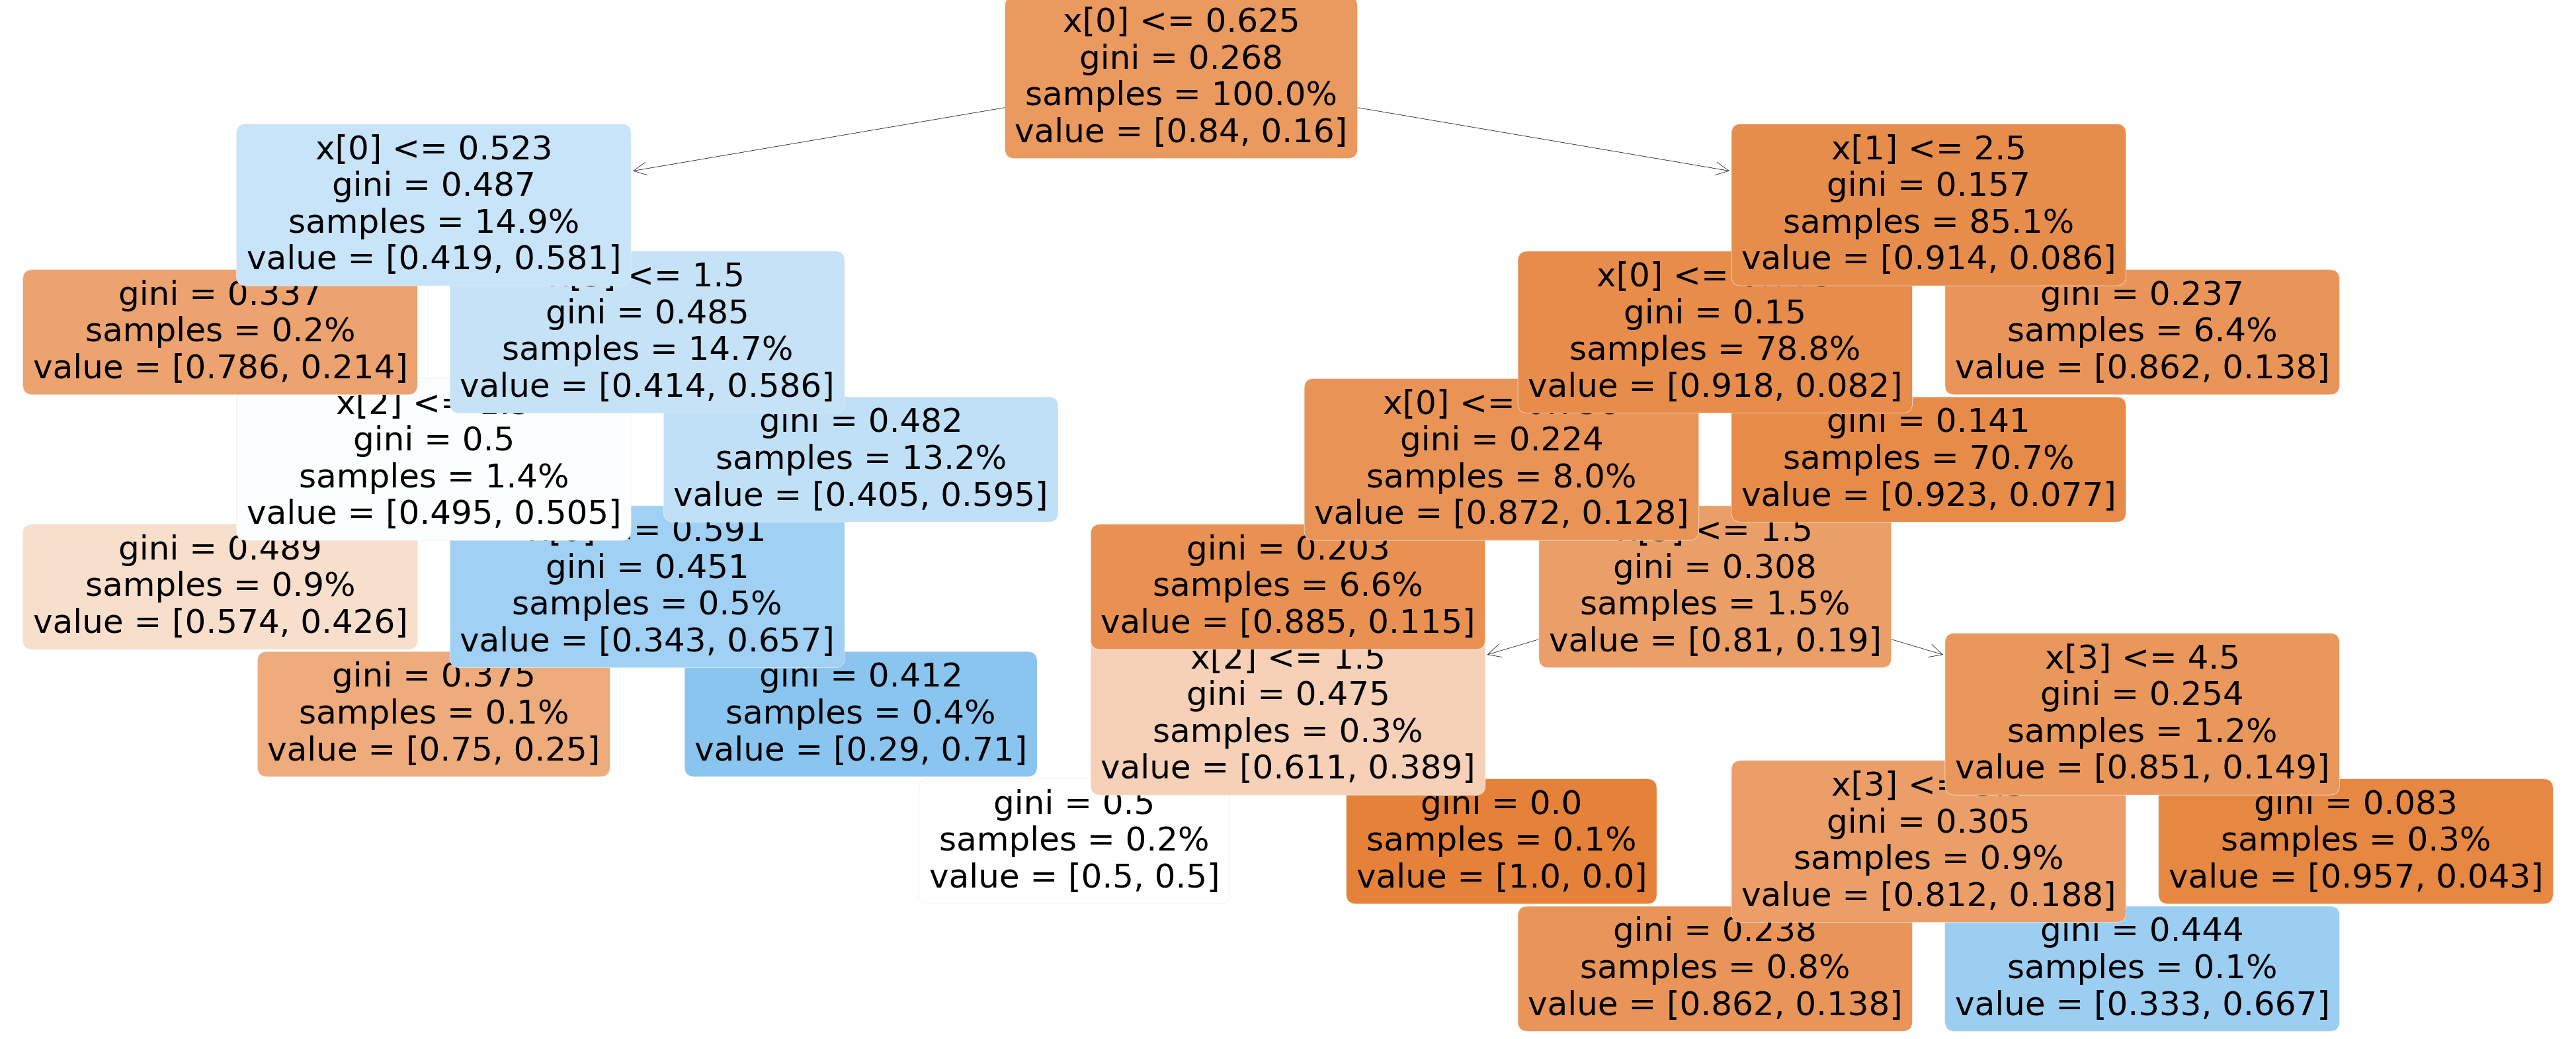

In [51]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
%time clf.fit(X_train, y_train)

print('Ein: %0.4f' % (1 - accuracy_score(y_train, clf.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, clf.predict(X_test))))
print(classification_report(y_test, clf.predict(X_test)))

#Tree drawing
plt.figure(figsize=(50,20))
plot_tree(
    clf,
    filled=True,
    proportion = True,
    fontsize=36,
    rounded = True)
plt.show()